In [32]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import lag_plot
from math import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings('ignore')

In [33]:
data = os.chdir(r"C:\Users\CC\Downloads")
data = pd.read_csv('monthly-beer-production-in-austr.csv',parse_dates=True,index_col=0)

In [34]:
data

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9
...,...
1975-08-01,143.4
1975-09-01,142.2
1975-10-01,188.4


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 240 entries, 1956-01-01 to 1975-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Monthly beer production  240 non-null    float64
dtypes: float64(1)
memory usage: 3.8 KB


In [36]:
data.describe()

,Monthly beer production
count,240.000000
mean,115.193750
std,29.712495
min,64.800000
25%,92.700000
50%,113.000000
75%,132.800000
max,199.200000


In [37]:
data['Year']=data.index.year
data['Months']=data.index.month_name()

In [38]:
data.head()

,Monthly beer production,Year,Months
Month,,,
1956-01-01,93.2,1956,January
1956-02-01,96.0,1956,February
1956-03-01,95.2,1956,March
1956-04-01,77.1,1956,April
1956-05-01,70.9,1956,May


# Exploratory Data Analysis

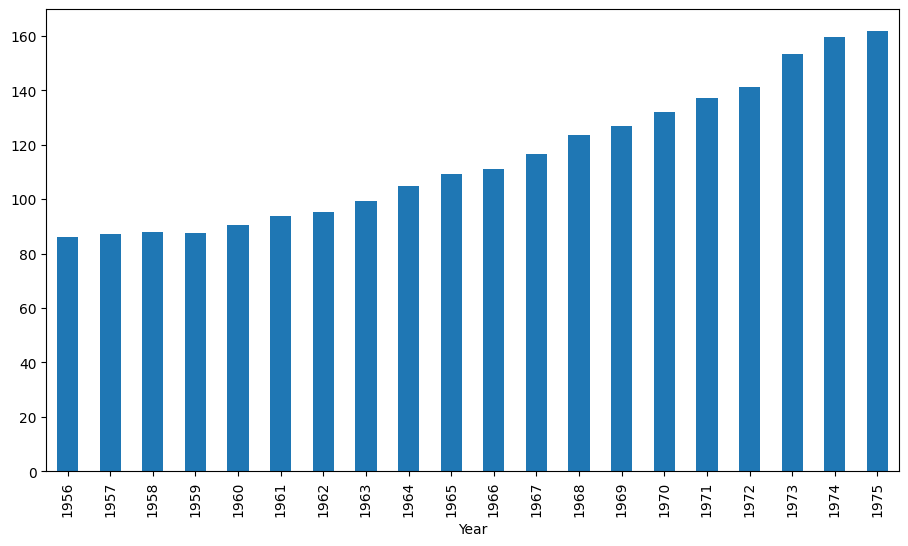

In [39]:
plt.figure(figsize=(11,6))
data.groupby('Year')['Monthly beer production'].mean().plot(kind='bar')
plt.show()

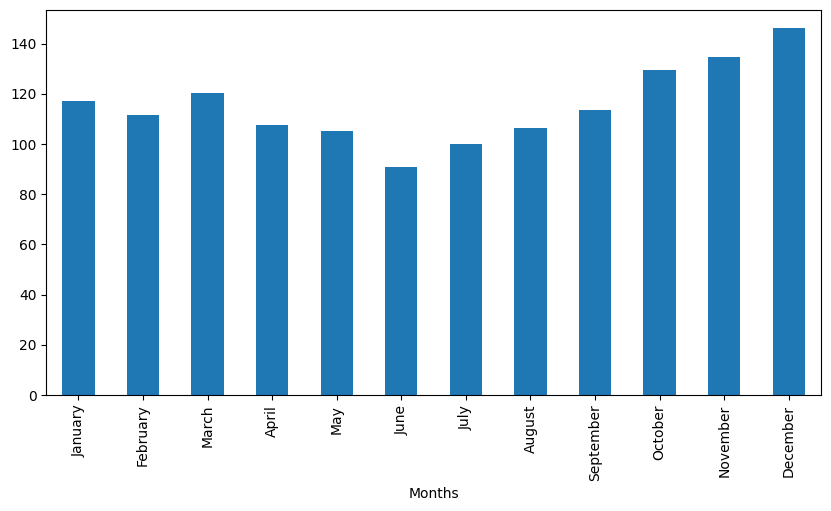

In [40]:
plt.figure(figsize=(10,5))
data.groupby('Months')['Monthly beer production'].mean().reindex(index=['January','February','March','April','May','June','July','August','September','October','November','December']).plot(kind='bar')
plt.show()

In [41]:
month=pd.pivot_table(data,values='Monthly beer production',index='Months',columns='Year')
month=month.reindex(index=['January','February','March','April','May','June','July','August','September','October','November','December'])

In [42]:
month

Year,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975
Months,,,,,,,,,,,,,,,,,,,,
January,93.2,95.9,96.3,89.8,97.1,105.1,100.0,106.0,106.1,106.9,104.6,116.4,131.5,131.2,126.9,132.6,128.1,153.1,164.1,161.4
February,96.0,82.8,84.4,84.4,93.0,92.5,84.8,91.2,102.1,96.6,107.1,112.6,131.0,125.4,124.0,123.7,138.4,147.6,142.8,169.4
March,95.2,83.3,91.2,87.2,96.0,97.1,94.3,96.6,105.2,127.3,123.5,123.8,130.5,126.5,135.7,153.3,152.7,157.7,157.9,168.8
April,77.1,80.0,81.9,85.6,80.5,81.4,87.1,96.3,101.0,98.2,98.8,103.6,118.9,119.4,130.0,134.0,120.0,137.2,159.2,158.1
May,70.9,80.4,80.5,72.0,76.1,79.1,90.3,88.2,84.3,100.2,98.6,113.9,114.3,113.5,109.4,119.6,140.5,151.5,162.2,158.5
June,64.8,67.5,70.4,69.2,69.9,72.1,72.4,70.2,87.5,89.4,90.6,98.6,85.7,98.7,117.8,116.2,116.2,98.7,123.1,135.3
July,70.1,75.7,74.8,77.5,73.6,78.7,84.9,86.5,92.7,95.3,89.1,95.0,104.6,114.5,120.3,118.6,121.4,145.8,130.0,149.3
August,77.3,71.1,75.9,78.1,92.6,87.1,92.7,88.2,94.4,104.2,105.2,116.0,105.1,113.8,121.0,130.7,127.8,151.7,150.1,143.4
September,79.5,89.3,86.3,94.3,94.2,91.4,92.2,102.8,113.0,106.4,114.0,113.9,117.3,133.1,132.3,129.3,143.6,129.4,169.4,142.2


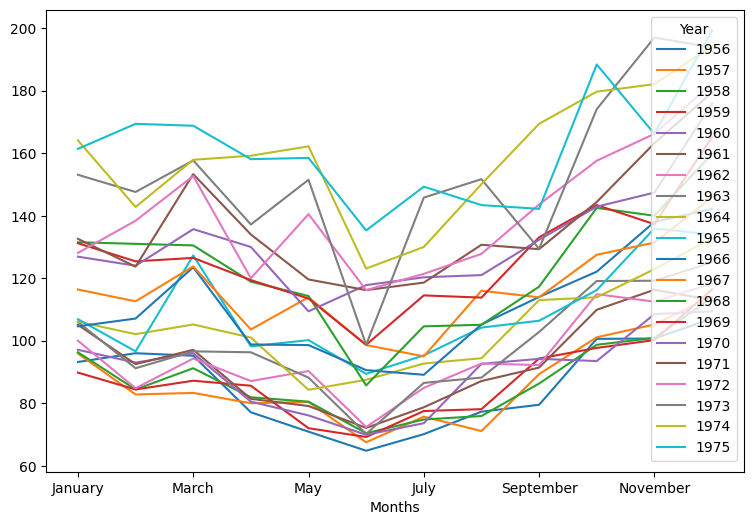

In [43]:
month.plot(figsize=(9,6))
plt.show()

# Trend and seasonality plot

<Axes: xlabel='Month'>

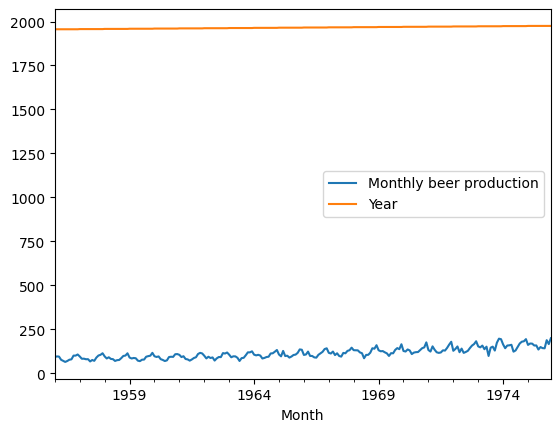

In [44]:
data.plot()

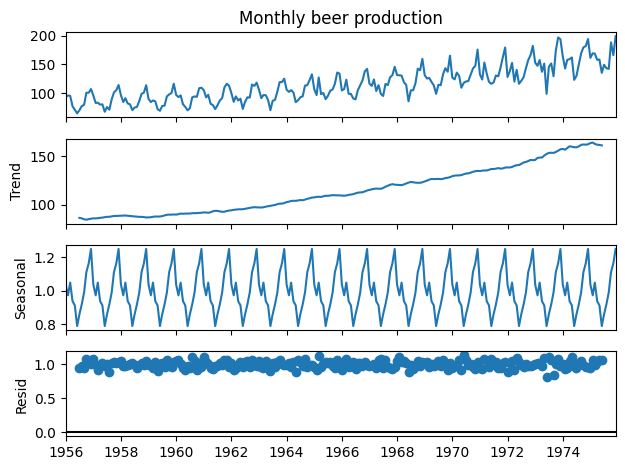

In [45]:
seaonal=seasonal_decompose(data['Monthly beer production'],model='multiplicative')
seaonal.plot()
plt.show()

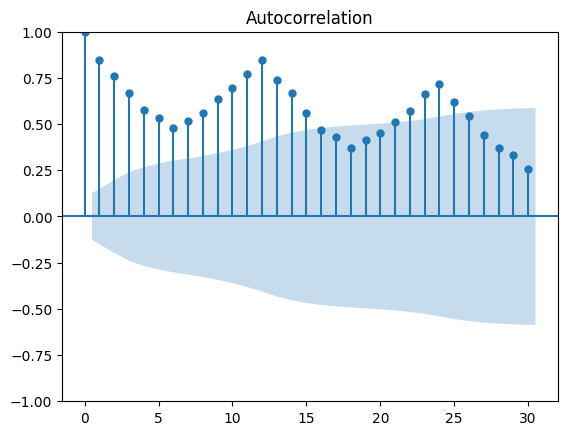

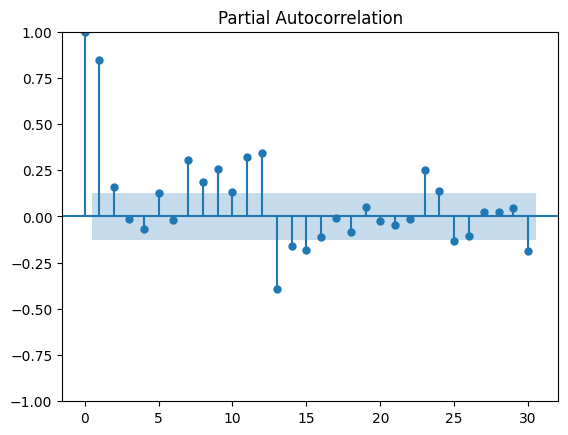

In [46]:
plot_acf(data['Monthly beer production'],lags=30)
plot_pacf(data['Monthly beer production'],lags=30)
plt.show()

In [47]:
#Ho: The data is non-stationary
##H1: The data is stationary
from statsmodels.tsa.stattools import adfuller

adf_test=adfuller(data['Monthly beer production'],autolag='AIC')
print("1. ADF test:",adf_test[0])
print("2. ADF test p-value:",adf_test[1])
print("3. Number of lags :", adf_test[2])

# Check if the time series is stationary
if adf_test[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")

1. ADF test: 3.06846533428006
2. ADF test p-value: 1.0
3. Number of lags : 13
The time series is not stationary.


The null hypothesis of the ADF test is that time series is non stationary. The output shows that p-value is (1.0) which greater than significance level (0.05). Hence, we failed to reject the null hypothesis and conclude that the series is non stationary. 

In [48]:
data['Monthly beer production_1st_diff'] = data['Monthly beer production'] - data['Monthly beer production'].shift(1)
data.head()

,Monthly beer production,Year,Months,Monthly beer production_1st_diff
Month,,,,
1956-01-01,93.2,1956,January,NaN
1956-02-01,96.0,1956,February,2.8
1956-03-01,95.2,1956,March,-0.8
1956-04-01,77.1,1956,April,-18.1
1956-05-01,70.9,1956,May,-6.2


<Axes: xlabel='Month'>

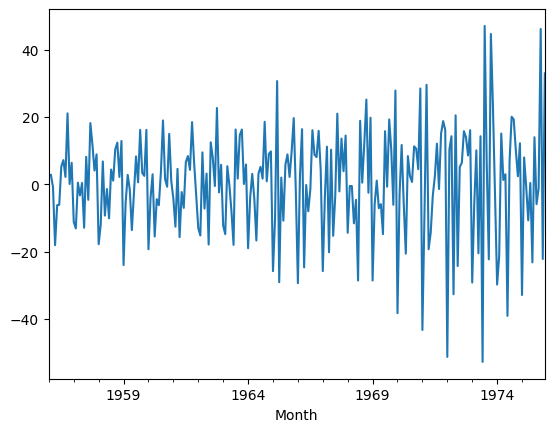

In [49]:
data['Monthly beer production_1st_diff'].plot()

In [50]:
adf_test=adfuller(data['Monthly beer production_1st_diff'].dropna(),autolag='AIC')
print("1. ADF test:",adf_test[0])
print("2. ADF test p-value:",adf_test[1])
print("3. Number of lags :", adf_test[2])

# Check if the time series is stationary
if adf_test[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")

1. ADF test: -8.378156280277693
2. ADF test p-value: 2.552702190010268e-13
3. Number of lags : 13
The time series is stationary.


After doing the difference in our time series data, we found that p-value is less than the significance level (0.05) and hence we reject the null hypothesis and the series is stationary

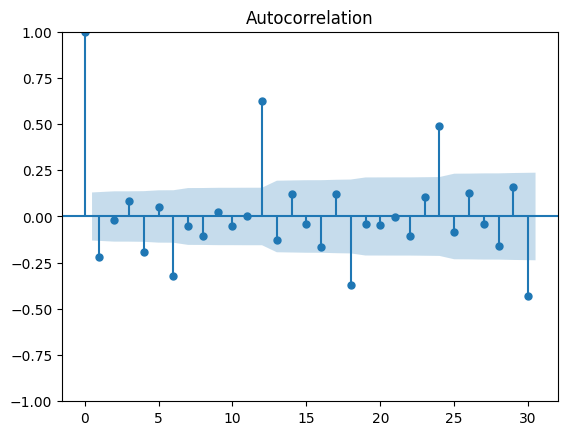

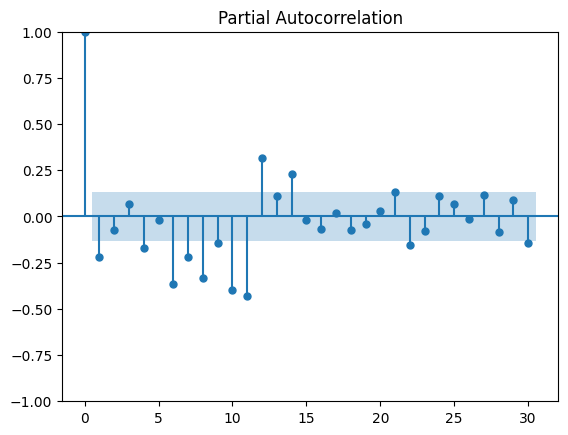

In [51]:
plot_acf(data['Monthly beer production_1st_diff'].iloc[13:],lags=30)
plot_pacf(data['Monthly beer production_1st_diff'].iloc[13:],lags=30)
plt.show()

From above plots we conclude that value of p can be 1, d can be 1 and q can be either 0 or 1. We choose the order of ARIMA as (1,1,1)

# ARIMA Model

In [52]:
from statsmodels.tsa.arima.model import ARIMA

model_arima=ARIMA(data['Monthly beer production'],order=(1,1,1)).fit()
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Monthly beer production   No. Observations:                  240
Model:                      ARIMA(1, 1, 1)   Log Likelihood                -975.103
Date:                     Sun, 11 Jun 2023   AIC                           1956.206
Time:                             14:40:28   BIC                           1966.635
Sample:                         01-01-1956   HQIC                          1960.408
                              - 12-01-1975                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5644      0.068      8.349      0.000       0.432       0.697
ma.L1         -0.9327      0.032    -29.320      0.000      -0.995      -0.870
sigma2       204.0006     16.797     12.145      0.000     171.080     236.921
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 2.61
Prob(Q):                              0.76   Prob(JB):                         0.27
Heteroskedasticity (H):               3.77   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [53]:
data.shape

(240, 4)

In [54]:
data['pred']=model_arima.predict(start=90,end=105,dynamic=True)

<Axes: xlabel='Month'>

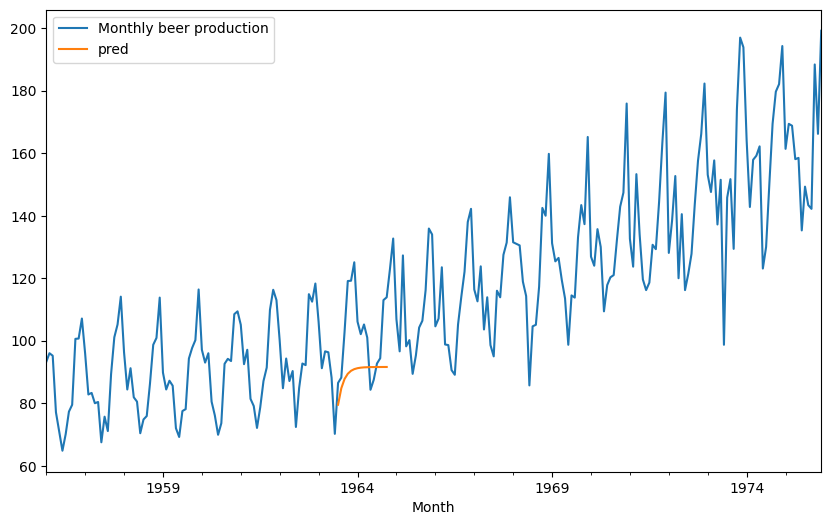

In [55]:
data[['Monthly beer production','pred']].plot(figsize=(10,6))

From the plot we can see that our forecast is not efficient as ARIMA model not consider the seasonal part in model building. Hence we can try with Seasonal Arima model.

# Seasonal ARIMA Model

In [56]:
import statsmodels.api as sm

model2=sm.tsa.statespace.SARIMAX(data['Monthly beer production'],order=(1,1,1),seasonal_order=(1,1,1,12)).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:            Monthly beer production   No. Observations:                  240
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -783.848
Date:                            Sun, 11 Jun 2023   AIC                           1577.696
Time:                                    14:40:32   BIC                           1594.821
Sample:                                01-01-1956   HQIC                          1584.606
                                     - 12-01-1975                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1245      0.062     -2.008      0.045      -0.246      -0.003
ma.L1         -0.8999      0.031    -29.114      0.000      -0.960      -0.839
ar.S.L12       0.1447      0.096      1.508      0.132      -0.043       0.333
ma.S.L12      -0.8164      0.068    -12.012      0.000      -0.950      -0.683
sigma2        55.2644      3.994     13.836      0.000      47.436      63.093
===================================================================================
Ljung-Box (L1) (Q):                   0.39   Jarque-Bera (JB):                29.34
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):               4.10   Skew:                            -0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

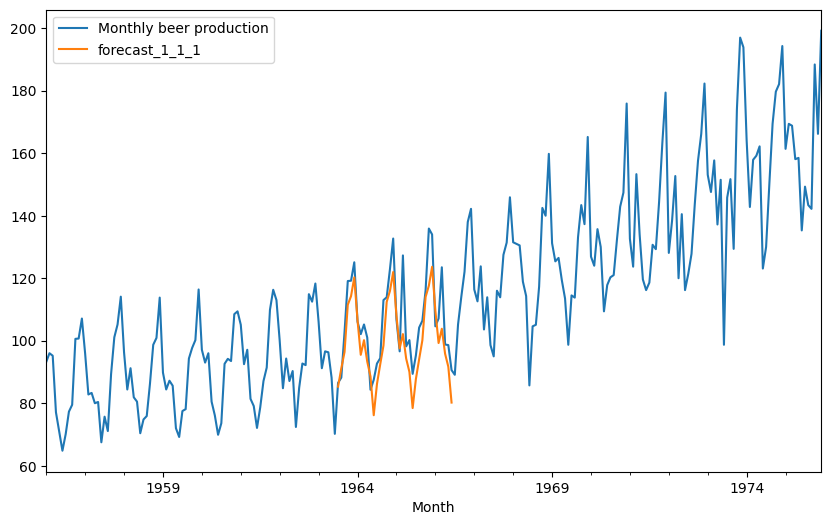

In [57]:
data['forecast_1_1_1']=model2.predict(start=90,end=125,dynamic=True)
data[['Monthly beer production','forecast_1_1_1']].plot(figsize=(10,6))

In [58]:
# Forecast for the next 3 years 
forecast = model2.predict(start = len(data),  
                          end = (len(data)-1) + 3 * 12,  
                          typ = 'levels').rename('Forecast')

<Axes: xlabel='Month'>

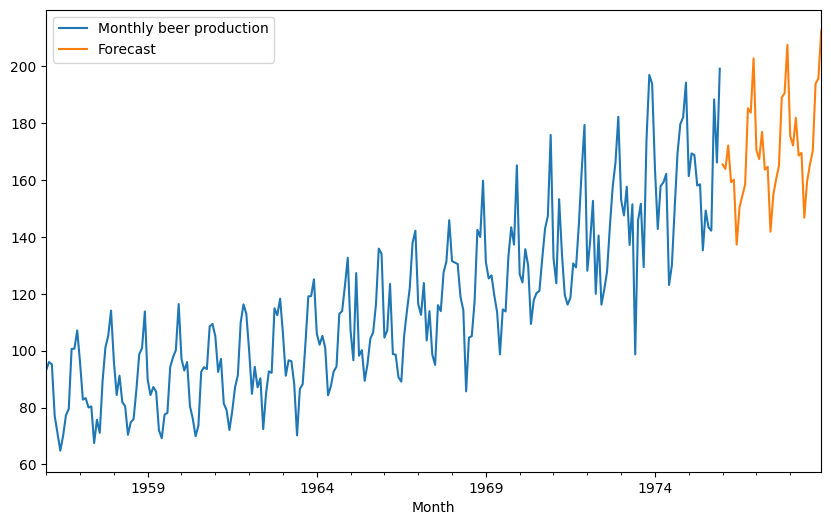

In [59]:
# Plot the forecast values 
data['Monthly beer production'].plot(figsize = (10,6), legend = True) 
forecast.plot(legend = True)